From Christiansen+ (2015), the gamma CDF is defined (Equation 1) as:

$$F(x\,|\,a,b) = \frac{1}{b^a \Gamma(a)} \int_0^x t^{a-1} e^{-t/b}\,dt$$

Scipy defines the [incomplete gamma function](http://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gammainc.html#scipy.special.gammainc) as follows:

$$\gamma(a, x) = \frac{1}{\Gamma(a)} \int_0^x e^{-t} t^{a-1}\,dt$$

These are almost the same.  Substitute $u = t/b$ into the Christiansen+ function:

$$F(x\,|\,a,b) = \frac{1}{b^a \Gamma(a)} \int_0^{x/b} (bu)^{a-1} e^{-u}b\,du$$ 
$$F(x\,|\,a,b) = \frac{1}{b^a \Gamma(a)} b^{a-1}b \int_0^{x/b} u^{a-1} e^{-u}\,du$$ 
$$F(x\,|\,a,b) = \frac{1}{\Gamma(a)} \int_0^{x/b} e^{-u} u^{a-1}\,du = \gamma(a, x/b)$$

This matches up with the Wikipedia definition of the gamma function CDF with $a \rightarrow k$ and $b \rightarrow \theta$ (taking into account the Wikipedia definition of the incomplete gamma function lacks

So this should be how to evaluate the gamma CDF from Christiansen+:

In [23]:
from scipy.special import gammainc 

def gamma_cdf(x, a, b):
    return gammainc(a, x/b)

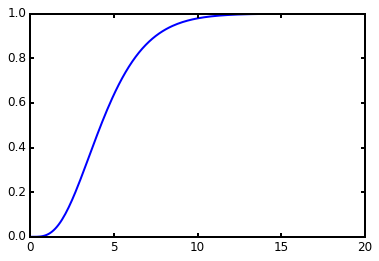

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

a, b = 4.35, 1.05

snr = np.arange(0, 20, 0.1)
plt.plot(snr, gamma_cdf(snr, a, b));

But this is very different from what is in the paper (e.g. Figure(3)).